# Pengolahan Citra

**Nama :** Intan Aulia Majid  
**NIM :** 230411100001  
**Kelas** : Pengolahan Citra ( D )

# Representasi Citra

**Import Library**

In [2]:
import cv2 as cv
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

**Membaca Gambar**

In [3]:
image = cv.imread('cumil.jpeg')
img = Image.open("cumil.jpeg") # menggunakan PIL

print("Format Gambar:", img.format)
print("Dimensi Gambar:", img.size[0], "x", img.size[1])

# menghitung jumlah pixel 
width, height = img.size
num_pixels = width * height
print("Jumlah Pixel:", num_pixels)

# Representasi Matriks
imgMatrix = np.array(img)
print("Dimensi Matriks:", imgMatrix.shape)

Format Gambar: JPEG
Dimensi Gambar: 3119 x 4160
Jumlah Pixel: 12975040
Dimensi Matriks: (4160, 3119, 3)


**Menampilkan Gambar**

In [4]:
# resize karena image terlalu besar
image = cv.resize(image, (int(image.shape[1]/8), int(image.shape[0]/8)))

# cv.imshow('Cumil', image)
# cv.waitKey(0)
# cv.destroyAllWindows()

# Operasi Dasar Citra

### Konsep Filtering

Image Filtering (atau *convolution*) merupakan salah satu teknik pengolahan citra yang banyak digunakan. Filtering menggunakan prinsip pengolahan citra sederhana dimana setiap band pada sebuah citra dianggap sebagai sebuah matriks. Selanjutnya, operasi matematika dilakukan pada matriks tersebut untuk memperoleh atau menguatkan fitur tertentu yang ada pada citra tersebut. Operasi Image Filtering sering digunakan sebagai langkah awal dalam pengolahan (pre-processing) citra, misalnya untuk menghilangkan noise atau memperkuat fitur dengan ciri tertentu pada citra.

Image Filtering bekerja dengan cara menjalankan sebuah *'kernel'* (ingat biji jagung: berukuran kecil) atau matriks persegi dengan ukuran tertentu pada seluruh citra secara bertahap. Inilah mengapa operasi kernel pada seringkali disebut sebagai *'moving window'*. [Link berikut](http://setosa.io/ev/image-kernels/) memberikan penjelasan yang sangat baik mengenai bagaimana sebuah filter bekerja.

![](https://miro.medium.com/max/2340/1*Fw-ehcNBR9byHtho-Rxbtw.gif)

Dengan perkembangan pada bidang Deep Learning, Convolution menjadi salah satu teknik penting yang digunakan untuk mengekstraksi fitur level rendah dari sebuah gambar. Karenanya, memahami konsep ini diperlukan untuk memahami bagaimana cara Deep Learning bekerja, khususnya pada metode seperti Convolution Neural Network (CNN). Lihat [link berikut](https://poloclub.github.io/cnn-explainer/#article-convolution) untuk memberikan gambaran bagaimana algoritma CNN menggunakan convolution untuk mengenali sebuah objek.

Jika istilah **filter** terasa familiar bagi Anda, mungkin hal ini karena banyak sosial media (seperti instagram) yang menggunakan [prinsip yang sama](https://onezero.medium.com/how-instagrams-viral-face-filters-work-5c98ba05122f) untuk mengolah foto dari penggunanya.

![](https://miro.medium.com/max/600/1*WBLrs0Gv7kmIYjGICFu4zg.gif)

### Melakukan Operasi Image Filtering dengan OpenCV


**1. Low-Pass Filtering**

OpenCV memiliki [berbagai operasi](https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html) yang dapat digunakan untuk proses filtering, diantaranya: Averaging, Gaussian, Median filter dan Billateral filtering. Pada bagian ini akan dilakukan beberapa percobaan menggunakan fungsi-fungsi OpenCV untuk melakukan Image Filtering. Gunakan data yang diberikan sebagai latihan, atau gunakan gambar yang dapat Anda temukan dari internet.

Sebagai latihan pertama, akan dilakukan filtering pada gambar `cumil.jpeg` dengan menggunakan kernel berupa matriks berukuran [5x5] sebagai berikut:

K = 
$\frac {1}{25} \begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix}$

In [5]:
cumil = cv.imread('cumil.jpeg')

#bgr
cumil = cv.resize(cumil, (int(cumil.shape[1]/8), int(cumil.shape[0]/8)))

#rgb
cumil = cv.cvtColor(cumil, cv.COLOR_BGR2RGB)

# tampilkan gambar awal tanpa filter
cv.imshow('Original', cumil)

# membuat filter: matriks berukuran 5 x 5
kernel = np.ones((5,5),np.float32)/25
print(kernel)

# lakukan filtering
cumil_filter = cv.filter2D(cumil,-1,kernel)

cv.imshow('Filtered', cumil_filter)

# salt and pepper


[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


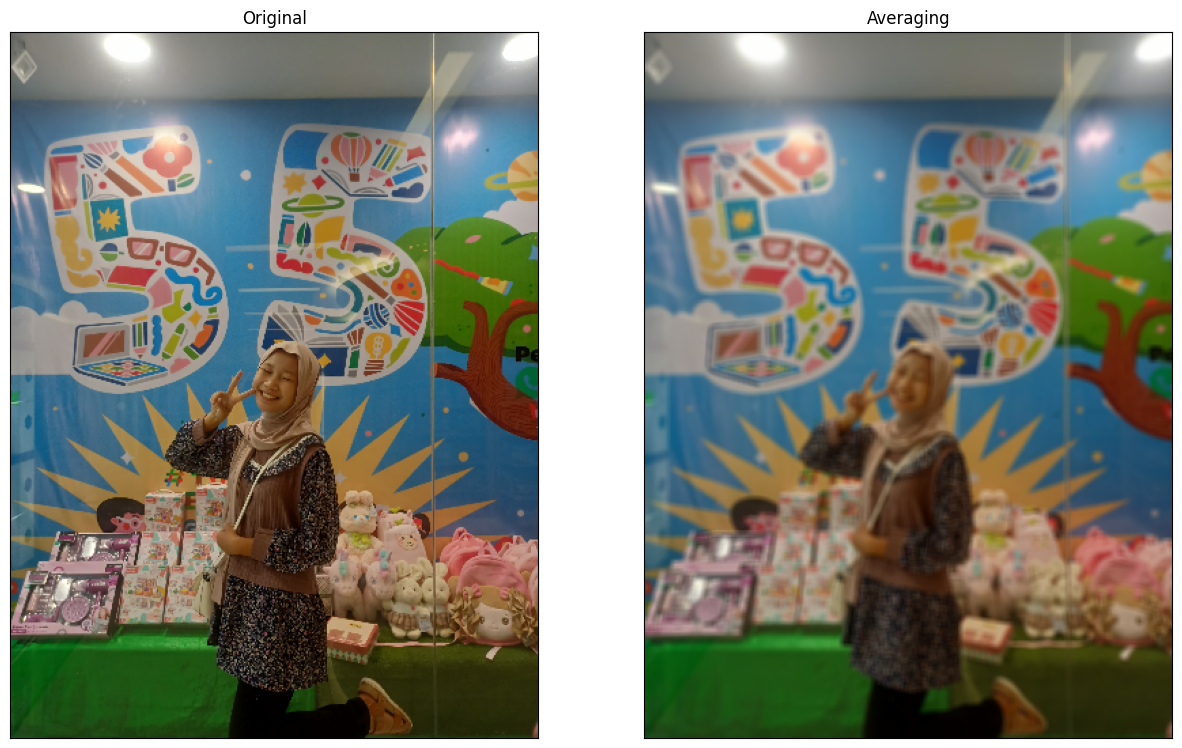

In [6]:
# perbesar ukuran hasil plotting jika diperlukan
plt.rcParams["figure.figsize"] = (15,15)

# plot pertama, gambar asli
plt.subplot(121),plt.imshow(cumil),plt.title('Original')
plt.xticks([]), plt.yticks([])

# kedua, hasil filter
plt.subplot(122),plt.imshow(cumil_filter),
plt.title('Averaging')
plt.xticks([]), plt.yticks([])

# Plot!
plt.show()

In [7]:
cumil_blurred = cv.blur(cumil,(5,5))

cv.imshow('Blurred', cumil_blurred)